In [1]:
import os
import pandas as pd
import stylia as st
from stylia import NamedColors, ContinuousColorMap, ONE_COLUMN_WIDTH, TWO_COLUMNS_WIDTH
import matplotlib.pyplot as plt

DATAPATH = "../data"
RESULTSPATH = "../results"

colors = NamedColors()
red = colors.get("red")
blue = colors.get("blue")
purple = colors.get("purple")
yellow = colors.get("yellow")
green = colors.get("green")
orange = colors.get("orange")
gray = colors.get("gray")

# AFR AB and AFR SP in PharmGKB

How many of the variants in PharmGKB are african abundant/African specific? Is there an underrepresentation of those variants vs variants abundant in other populations?

In [2]:
%%capture
df = pd.read_csv(os.path.join(DATAPATH, "variants", "pharmgkb", "pharmgkb_mutations_gene_level.tsv"), sep="\t")
pgkb = pd.read_csv("data/pharmgkb_merged_triplets.csv")
adme = pd.read_csv("data/adme_genes.csv")

all_genes = list(set(pgkb["gene"].tolist()))
adme_genes = adme["gene"].tolist()

all_vars = df[df["gene"].isin(all_genes)]
adme_vars = df[df["gene"].isin(adme_genes)]

#ARE AFR AB already counting AFR SP?

all_vars["perc_afr_ab"]= (all_vars["afr_abundant_variants"]/all_vars["total_variants"]).round(2)
all_vars["perc_afr_sp"]= (all_vars["afr_specific_variants"]/all_vars["total_variants"]).round(2)
all_vars["perc_other"] = ((all_vars["total_variants"]-all_vars["afr_abundant_variants"])/all_vars["total_variants"]).round(2)
adme_vars["perc_afr_ab"]= (adme_vars["afr_abundant_variants"]/adme_vars["total_variants"]).round(2)
adme_vars["perc_afr_sp"]= (adme_vars["afr_specific_variants"]/adme_vars["total_variants"]).round(2)
adme_vars["perc_other"] = ((adme_vars["total_variants"]-adme_vars["afr_abundant_variants"])/adme_vars["total_variants"]).round(2)

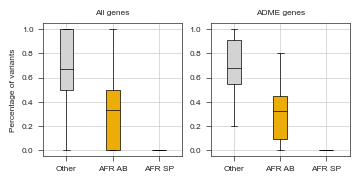

In [23]:
#VARIANTS IN GENES THAT APPEAR IN PGKB
fig, axs = st.create_figure(1,2, width=TWO_COLUMNS_WIDTH/2, height=TWO_COLUMNS_WIDTH/4)
colors = [gray, yellow, purple]
medianprops = dict(color="black", linewidth=0.5)
boxprops = dict(linewidth=0.5)
whiskerprops = dict(linewidth=0.5)
capprops = dict(linewidth=0.5)
ax = axs.next()
bp = ax.boxplot([all_vars["perc_other"], all_vars["perc_afr_ab"], all_vars["perc_afr_sp"]],
           patch_artist=True, labels=['Other', 'AFR AB', "AFR SP"], 
           medianprops= medianprops,boxprops=boxprops,showfliers=False, whiskerprops=whiskerprops, capprops=capprops)
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
st.label(ax, xlabel="", ylabel = "Percentage of variants", title="All genes",abc="")
ax = axs.next()
bp = ax.boxplot([adme_vars["perc_other"], adme_vars["perc_afr_ab"], adme_vars["perc_afr_sp"]],
           patch_artist=True, labels=['Other', 'AFR AB', "AFR SP"], 
           medianprops= medianprops,boxprops=boxprops,showfliers=False, whiskerprops=whiskerprops, capprops=capprops)
for patch, color in zip(bp["boxes"], colors):
    patch.set_facecolor(color)
st.label(ax, xlabel="", ylabel = "",  title="ADME genes", abc="")
plt.tight_layout()

In [4]:
# VARIANTS THAT APPEAR IN PGKB
df = pd.read_csv(os.path.join(DATAPATH, "variants", "pharmgkb", "pharmgkb_mutations.tsv"), sep="\t", low_memory=False)
df = df[['AF', 'EAS_AF', 'EUR_AF', 'AFR_AF', 'AMR_AF', 'SAS_AF', 'PGKBVID']]
print(df.shape)
df.drop_duplicates(keep="first", inplace=True)
print(df.shape)

(24915, 7)
(9318, 7)


In [5]:
pgkb_vars = pgkb.merge(df, left_on='vid', right_on='PGKBVID', how='left')
print(len(pgkb_vars[pgkb_vars["AF"].isna()]))
pgkb_vars.dropna(subset=["AF"], inplace=True)

6643


In [6]:
pgkb_vars

,cid,chemical,smiles,gid,gene,vid,variant,is_infectious,is_noncommunicable,AF,EAS_AF,EUR_AF,AFR_AF,AMR_AF,SAS_AF,PGKBVID
0,PA165950341,ivacaftor,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,PA109,CFTR,PA166157516,rs75527207,0,1,0.00,0.00,0.00,0.00,0.00,0.00,PA166157516
1,PA450379,mercaptopurine,C1=NC2=C(N1)C(=S)N=CN2,PA134865839,SLCO1B1,PA166154579,rs4149056,0,1,0.09,0.12,0.16,0.01,0.14,0.04,PA166154579
2,PA450428,methotrexate,CN(CC1=CN=C2C(=N1)C(=NC(=N2)N)N)C3=CC=C(C=C3)C...,PA134865839,SLCO1B1,PA166154579,rs4149056,0,1,0.09,0.12,0.16,0.01,0.14,0.04,PA166154579
3,PA165950341,ivacaftor,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,PA109,CFTR,PA166164950,rs141033578,0,1,0.00,0.00,0.00,0.00,0.00,0.00,PA166164950
4,PA165950341,ivacaftor,CC(C)(C)C1=CC(=C(C=C1NC(=O)C2=CNC3=CC=CC=C3C2=...,PA109,CFTR,PA166164955,rs78769542,0,1,0.00,0.00,0.00,0.00,0.00,0.01,PA166164955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38180,PA451209,quinidine,COC1=CC2=C(C=CN=C2C=C1)[C@@H]([C@H]3C[C@@H]4CC...,PA128,CYP2D6,PA166178877,rs766507177,0,1,0.00,0.00,0.00,0.00,0.00,0.00,PA166178877
38184,PA451209,quinidine,COC1=CC2=C(C=CN=C2C=C1)[C@@H]([C@H]3C[C@@H]4CC...,PA128,CYP2D6,PA166178881,rs74478221,0,1,0.00,0.00,0.00,0.00,0.00,0.00,PA166178881
38185,PA451209,quinidine,COC1=CC2=C(C=CN=C2C=C1)[C@@H]([C@H]3C[C@@H]4CC...,PA128,CYP2D6,PA166178882,rs75467367,0,1,0.00,0.00,0.00,0.00,0.00,0.00,PA166178882
38186,PA451209,quinidine,COC1=CC2=C(C=CN=C2C=C1)[C@@H]([C@H]3C[C@@H]4CC...,PA128,CYP2D6,PA166169720,rs568495591,0,1,0.00,0.00,0.00,0.00,0.00,0.00,PA166169720


In [7]:
afr_ab = pgkb_vars[pgkb_vars["AFR_AF"]>=0.2]
print(len(afr_ab))
afr_sp = afr_ab[
    (afr_ab["AFR_AF"] >= 8 * afr_ab["EAS_AF"]) & 
    (afr_ab["AFR_AF"] >= 8 * afr_ab["SAS_AF"]) & 
    (afr_ab["AFR_AF"] >= 8 * afr_ab["EUR_AF"]) & 
    (afr_ab["AFR_AF"] >= 8 * afr_ab["AMR_AF"])
]
print(len(afr_sp))

4934
20


In [8]:
# check that % make sense with general data
all_genes = pgkb['gene'].value_counts().reset_index()
afr_ab_genes = afr_ab['gene'].value_counts().reset_index()
afr_sp_genes = afr_sp['gene'].value_counts().reset_index() 

In [11]:
all_genes.rename(columns={"count": "all_vars"}, inplace=True)
afr_ab_genes.rename(columns={"count": "afr_ab"}, inplace=True)
afr_sp_genes.rename(columns={"count": "afr_sp"}, inplace=True)

var_counts = all_genes.merge(afr_ab_genes, on="gene", how="left")
var_counts = var_counts.merge(afr_sp_genes, on="gene", how="left")
var_counts.fillna(0)
print(len(all_genes), len(var_counts))

1613 1613


In [12]:
var_counts

,gene,all_vars,afr_ab,afr_sp
0,CYP2D6,12364,NaN,NaN
1,CYP2C9,4734,13.0,NaN
2,CYP2B6,1204,62.0,1.0
3,CYP3A4,1053,66.0,NaN
4,CYP2A6,978,22.0,NaN
...,...,...,...,...
1608,ZNF211,1,NaN,NaN
1609,CORO7,1,1.0,NaN
1610,FXR2,1,NaN,NaN
1611,ZNF565,1,1.0,NaN


In [13]:
df_sum = pd.DataFrame({
    "Variants":["1kGPhg38", "AFR Abundant", "AFR Specific"],
    "All genes": [var_counts["all_vars"].sum(), 
                  f'{var_counts["afr_ab"].sum()} ({var_counts["afr_ab"].sum()/var_counts["all_vars"].sum()*100:.2f}%)', 
                  f'{var_counts["afr_sp"].sum()} ({var_counts["afr_sp"].sum()/var_counts["all_vars"].sum()*100:.2f}%)'],
})
df_sum

,Variants,All genes
0,1kGPhg38,33208
1,AFR Abundant,4659.0 (14.03%)
2,AFR Specific,19.0 (0.06%)


# Biotheque analysis of drug-protein pairs

Analysis using the (biotheque)[https://bioteque.irbbarcelona.org/bqsupports] to identify relevant interactions between the pairs of top 10 selected Gene-Drug interactions

In [6]:
#Prepare data for the server
df =pd.read_csv(os.path.join(RESULTSPATH, "results_pairs", "llm_top10_only_minimal_info.csv"))
df= df[["inchikey", "uniprot_ac"]]
df.to_csv("data/llm_drug_gene_pairs.txt", sep=' ', index=False, header=False)